In [1]:
import pandas as pd

df = pd.read_csv('output3.csv')
df.head()


,company,job,city,min_salary,max_salary,experience,education,financing,size,insurance,bonus,examination,weekend,prospect,team,travel,train
0,河南端琪实业发展有限公司,Python软件开发工程师,郑州,6000.0,8000.0,不限,不限,不需要融资,150-500人,Y,Y,N,N,N,N,N,N
1,帮伯乐,python开发工程师,上海,10000.0,18000.0,1-3年,本科,不需要融资,15-50人,N,N,N,N,N,N,N,N
2,浙江巨能环境工程有限公司,python开发工程师,杭州,15000.0,30000.0,3-5年,本科,不需要融资,50-150人,Y,Y,Y,N,N,N,N,N
3,上海全晓信息技术有限公司,"软件工程师（C++/C, Java/C#, python）",南京,15000.0,25000.0,3-5年,本科,未知,未知,N,N,Y,N,N,N,N,N
4,上海网擎信息系统有限公司,对日JAVA、Python高级工程师,上海,18000.0,35000.0,5-10年,本科,不需要融资,少于15人,Y,N,Y,N,N,N,Y,N


In [2]:
# 拆分 experience
# 先看看有几种experience
df['experience'].unique()

array(['不限', '1-3年', '3-5年', '5-10年', '在校/应届', '1年以下', '10年以上'],
      dtype=object)

In [3]:
# 正式开始拆分 experience

# 对于 在校/应届，都填0
df['experience'] = df['experience'].str.replace('在校/应届', '0-0')

# 对于 1 年以下，填0-1
df['experience'] = df['experience'].str.replace('1年以下', '0-1')

# 对于 10 年以上，填10-40（假设一个人65岁退休，25岁开始工作，大概是40年工作经验）
df['experience'] = df['experience'].str.replace('10年以上', '0-1')

# 对于 不限，填0-40（假设一个人65岁退休，25岁开始工作，大概是40年工作经验）
df['experience'] = df['experience'].str.replace('不限', '0-40')

# 移除 年 字符
df['experience'] = df['experience'].str.replace('年', '')

df[['min_experience', 'max_experience']] = df['experience'].str.split('-', expand=True).astype(int)
df1 = df.drop('experience', axis=1)
df1.head()

,company,job,city,min_salary,max_salary,education,financing,size,insurance,bonus,examination,weekend,prospect,team,travel,train,min_experience,max_experience
0,河南端琪实业发展有限公司,Python软件开发工程师,郑州,6000.0,8000.0,不限,不需要融资,150-500人,Y,Y,N,N,N,N,N,N,0,40
1,帮伯乐,python开发工程师,上海,10000.0,18000.0,本科,不需要融资,15-50人,N,N,N,N,N,N,N,N,1,3
2,浙江巨能环境工程有限公司,python开发工程师,杭州,15000.0,30000.0,本科,不需要融资,50-150人,Y,Y,Y,N,N,N,N,N,3,5
3,上海全晓信息技术有限公司,"软件工程师（C++/C, Java/C#, python）",南京,15000.0,25000.0,本科,未知,未知,N,N,Y,N,N,N,N,N,3,5
4,上海网擎信息系统有限公司,对日JAVA、Python高级工程师,上海,18000.0,35000.0,本科,不需要融资,少于15人,Y,N,Y,N,N,N,Y,N,5,10


In [4]:
# 拆分 size
# 先看看有几种 size
print(df1['size'].unique())
# 看看 2000人以上 的有哪些公司
df[df['size'] == '2000人以上']['company']

['150-500人' '15-50人' '50-150人' '未知' '少于15人' '500-2000人' '2000人以上']


16     Veeva System维我软件
59                 鱼跃医疗
62                  同花顺
63             京北方广州分公司
67      中铁第四勘察设计院集团有限公司
             ...       
363           科锐尔人力资源服务
364                科锐国际
365                科锐国际
368                  汇合
370           科锐尔人力资源服务
Name: company, Length: 70, dtype: object

In [5]:
# 正式开始拆分 size

# 替换特殊情况
df1['size'] = df1['size'].replace({
    '少于15人': '0-15',
    '2000人以上': '2000-208000',  # 查阅资料，最大公司应该是华为，在2025年5月11日大概208000人
    '未知': '0-208000'
})

# 移除 人 字符
df1['size'] = df1['size'].str.replace('人', '')

df1[['min_size', 'max_size']] = df1['size'].str.split('-', expand=True).astype(int)
df2 = df1.drop('size', axis=1)
df2.head()

,company,job,city,min_salary,max_salary,education,financing,insurance,bonus,examination,weekend,prospect,team,travel,train,min_experience,max_experience,min_size,max_size
0,河南端琪实业发展有限公司,Python软件开发工程师,郑州,6000.0,8000.0,不限,不需要融资,Y,Y,N,N,N,N,N,N,0,40,150,500
1,帮伯乐,python开发工程师,上海,10000.0,18000.0,本科,不需要融资,N,N,N,N,N,N,N,N,1,3,15,50
2,浙江巨能环境工程有限公司,python开发工程师,杭州,15000.0,30000.0,本科,不需要融资,Y,Y,Y,N,N,N,N,N,3,5,50,150
3,上海全晓信息技术有限公司,"软件工程师（C++/C, Java/C#, python）",南京,15000.0,25000.0,本科,未知,N,N,Y,N,N,N,N,N,3,5,0,208000
4,上海网擎信息系统有限公司,对日JAVA、Python高级工程师,上海,18000.0,35000.0,本科,不需要融资,Y,N,Y,N,N,N,Y,N,5,10,0,15


In [6]:
# 数据描述
df2.describe()
df2.to_csv('output4.csv', index=False)

In [7]:
# 基本统计量
numeric_df = df2[['min_salary','max_salary','min_experience','max_experience','min_size','max_size']]

print('最小值')
print(numeric_df.min())

print('最大值')
print(numeric_df.max())

print('平均值')
print(numeric_df.mean())

print('求和')
print(numeric_df.sum())

print('最小值')
print(numeric_df.min())

print('标准差')
print(numeric_df.std())


最小值
min_salary        2000.0
max_salary        3000.0
min_experience       0.0
max_experience       0.0
min_size             0.0
max_size            15.0
dtype: float64
最大值
min_salary         40000.0
max_salary         60000.0
min_experience         5.0
max_experience        40.0
min_size            2000.0
max_size          208000.0
dtype: float64
平均值
min_salary        12421.319797
max_salary        20175.126904
min_experience        1.822335
max_experience       10.406091
min_size            437.550761
max_size          55208.299492
dtype: float64
求和
min_salary         4894000.0
max_salary         7949000.0
min_experience         718.0
max_experience        4100.0
min_size            172395.0
max_size          21752070.0
dtype: float64
最小值
min_salary        2000.0
max_salary        3000.0
min_experience       0.0
max_experience       0.0
min_size             0.0
max_size            15.0
dtype: float64
标准差
min_salary         6023.292556
max_salary        10164.163490
min_experience    

In [8]:
# 按地区分组，进行统计量计算
# 按 city 分组统计平均、最大、最小值等统计量
grouped_city = df2.groupby("city")[['min_salary','max_salary','min_experience','max_experience','min_size','max_size']].agg(["mean", "max", "min", "sum"])
grouped_city

min_salary                                 max_salary           \
              mean      max      min        sum          mean      max   
city                                                                     
上海    14030.303030  35000.0   3000.0   926000.0  22090.909091  55000.0   
东莞     9500.000000  15000.0   4000.0    57000.0  14333.333333  25000.0   
中山    10000.000000  10000.0  10000.0    10000.0  16000.000000  16000.0   
佛山     8500.000000   9000.0   8000.0    17000.0  14500.000000  15000.0   
兰州     6000.000000   6000.0   6000.0     6000.0   8000.000000   8000.0   
北京    16569.230769  40000.0   2000.0  1077000.0  26476.923077  60000.0   
南京    11315.789474  20000.0   4000.0   215000.0  19000.000000  30000.0   
厦门     9000.000000  15000.0   3000.0    18000.0  12000.000000  20000.0   
合肥     9333.333333  10000.0   8000.0    28000.0  15333.333333  16000.0   
呼和浩特  10000.000000  10000.0  10000.0    10000.0  17000.000000  17000.0   
哈尔滨    7000.000000   8000.0   6000.0    14000.0  14000.000000  16000.0   
商丘     5000.000000   5000.0   5000.0     5000.0  10000.000000  10000.0   
天津    10833.333333  12000.0   8000.0    65000.0  15833.333333  20000.0   
太原    10000.000000  10000.0  10000.0    10000.0  18000.000000  18000.0   
宁波    10200.000000  13000.0   7000.0    51000.0  16600.000000  23000.0   
安阳    10000.000000  10000.0  10000.0    10000.0  15000.000000  15000.0   
常州     8000.000000   8000.0   8000.0     8000.0  13000.000000  13000.0   
广州    11347.826087  20000.0   5000.0   261000.0  17826.086957  40000.0   
廊坊    18000.000000  18000.0  18000.0    18000.0  30000.000000  30000.0   
张家口    6000.000000   6000.0   6000.0     6000.0  10000.000000  10000.0   
成都    10500.000000  18000.0   5000.0   189000.0  15666.666667  28000.0   
无锡    12333.333333  15000.0  10000.0    37000.0  20666.666667  25000.0   
昆明     8333.333333  10000.0   7000.0    25000.0  13333.333333  18000.0   
杭州    11076.923077  20000.0   4000.0   144000.0  20153.846154  30000.0   
梅州     8000.000000   8000.0   8000.0     8000.0  15000.000000  15000.0   
武汉    10300.000000  25000.0   5000.0   206000.0  17100.000000  40000.0   
沈阳     4500.000000   5000.0   4000.0     9000.0   8000.000000  10000.0   
济南    11000.000000  18000.0   8000.0    55000.0  18600.000000  26000.0   
深圳    13549.019608  30000.0   6000.0   691000.0  22294.117647  50000.0   
温州    13000.000000  13000.0  13000.0    13000.0  24000.000000  24000.0   
潍坊     8000.000000   8000.0   8000.0     8000.0  15000.000000  15000.0   
珠海     6750.000000   8000.0   5000.0    27000.0  11250.000000  14000.0   
石家庄    8000.000000  10000.0   6000.0    16000.0  11000.000000  12000.0   
福州     8000.000000   8000.0   8000.0     8000.0  15000.000000  15000.0   
苏州    14166.666667  20000.0   9000.0    85000.0  25666.666667  40000.0   
衡水     6000.000000   6000.0   6000.0     6000.0   9000.000000   9000.0   
西安    12642.857143  20000.0   6000.0   354000.0  22642.857143  40000.0   
贵阳     7500.000000   8000.0   7000.0    15000.0  12000.000000  14000.0   
郑州     5625.000000  10000.0   2000.0    45000.0   8000.000000  13000.0   
重庆     8000.000000  15000.0   4000.0    72000.0  12777.777778  22000.0   
长沙    10750.000000  15000.0   7000.0    43000.0  16250.000000  20000.0   
青岛     8666.666667  15000.0   5000.0    26000.0  12000.000000  20000.0   

                         min_experience      ... max_experience       \
          min        sum           mean max  ...            min  sum   
city                                         ...                       
上海     4000.0  1458000.0       1.954545   5  ...              0  589   
东莞     5000.0    86000.0       2.500000   5  ...              0   28   
中山    16000.0    16000.0       3.000000   3  ...              5    5   
佛山    14000.0    29000.0       2.000000   3  ...              3    8   
兰州     8000.0     8000.0       1.000000   1  ...              3    3   
北京     3000.0  1721000.0       1.676923   5  ...              0  851   
南京     5000.0   361000.0     

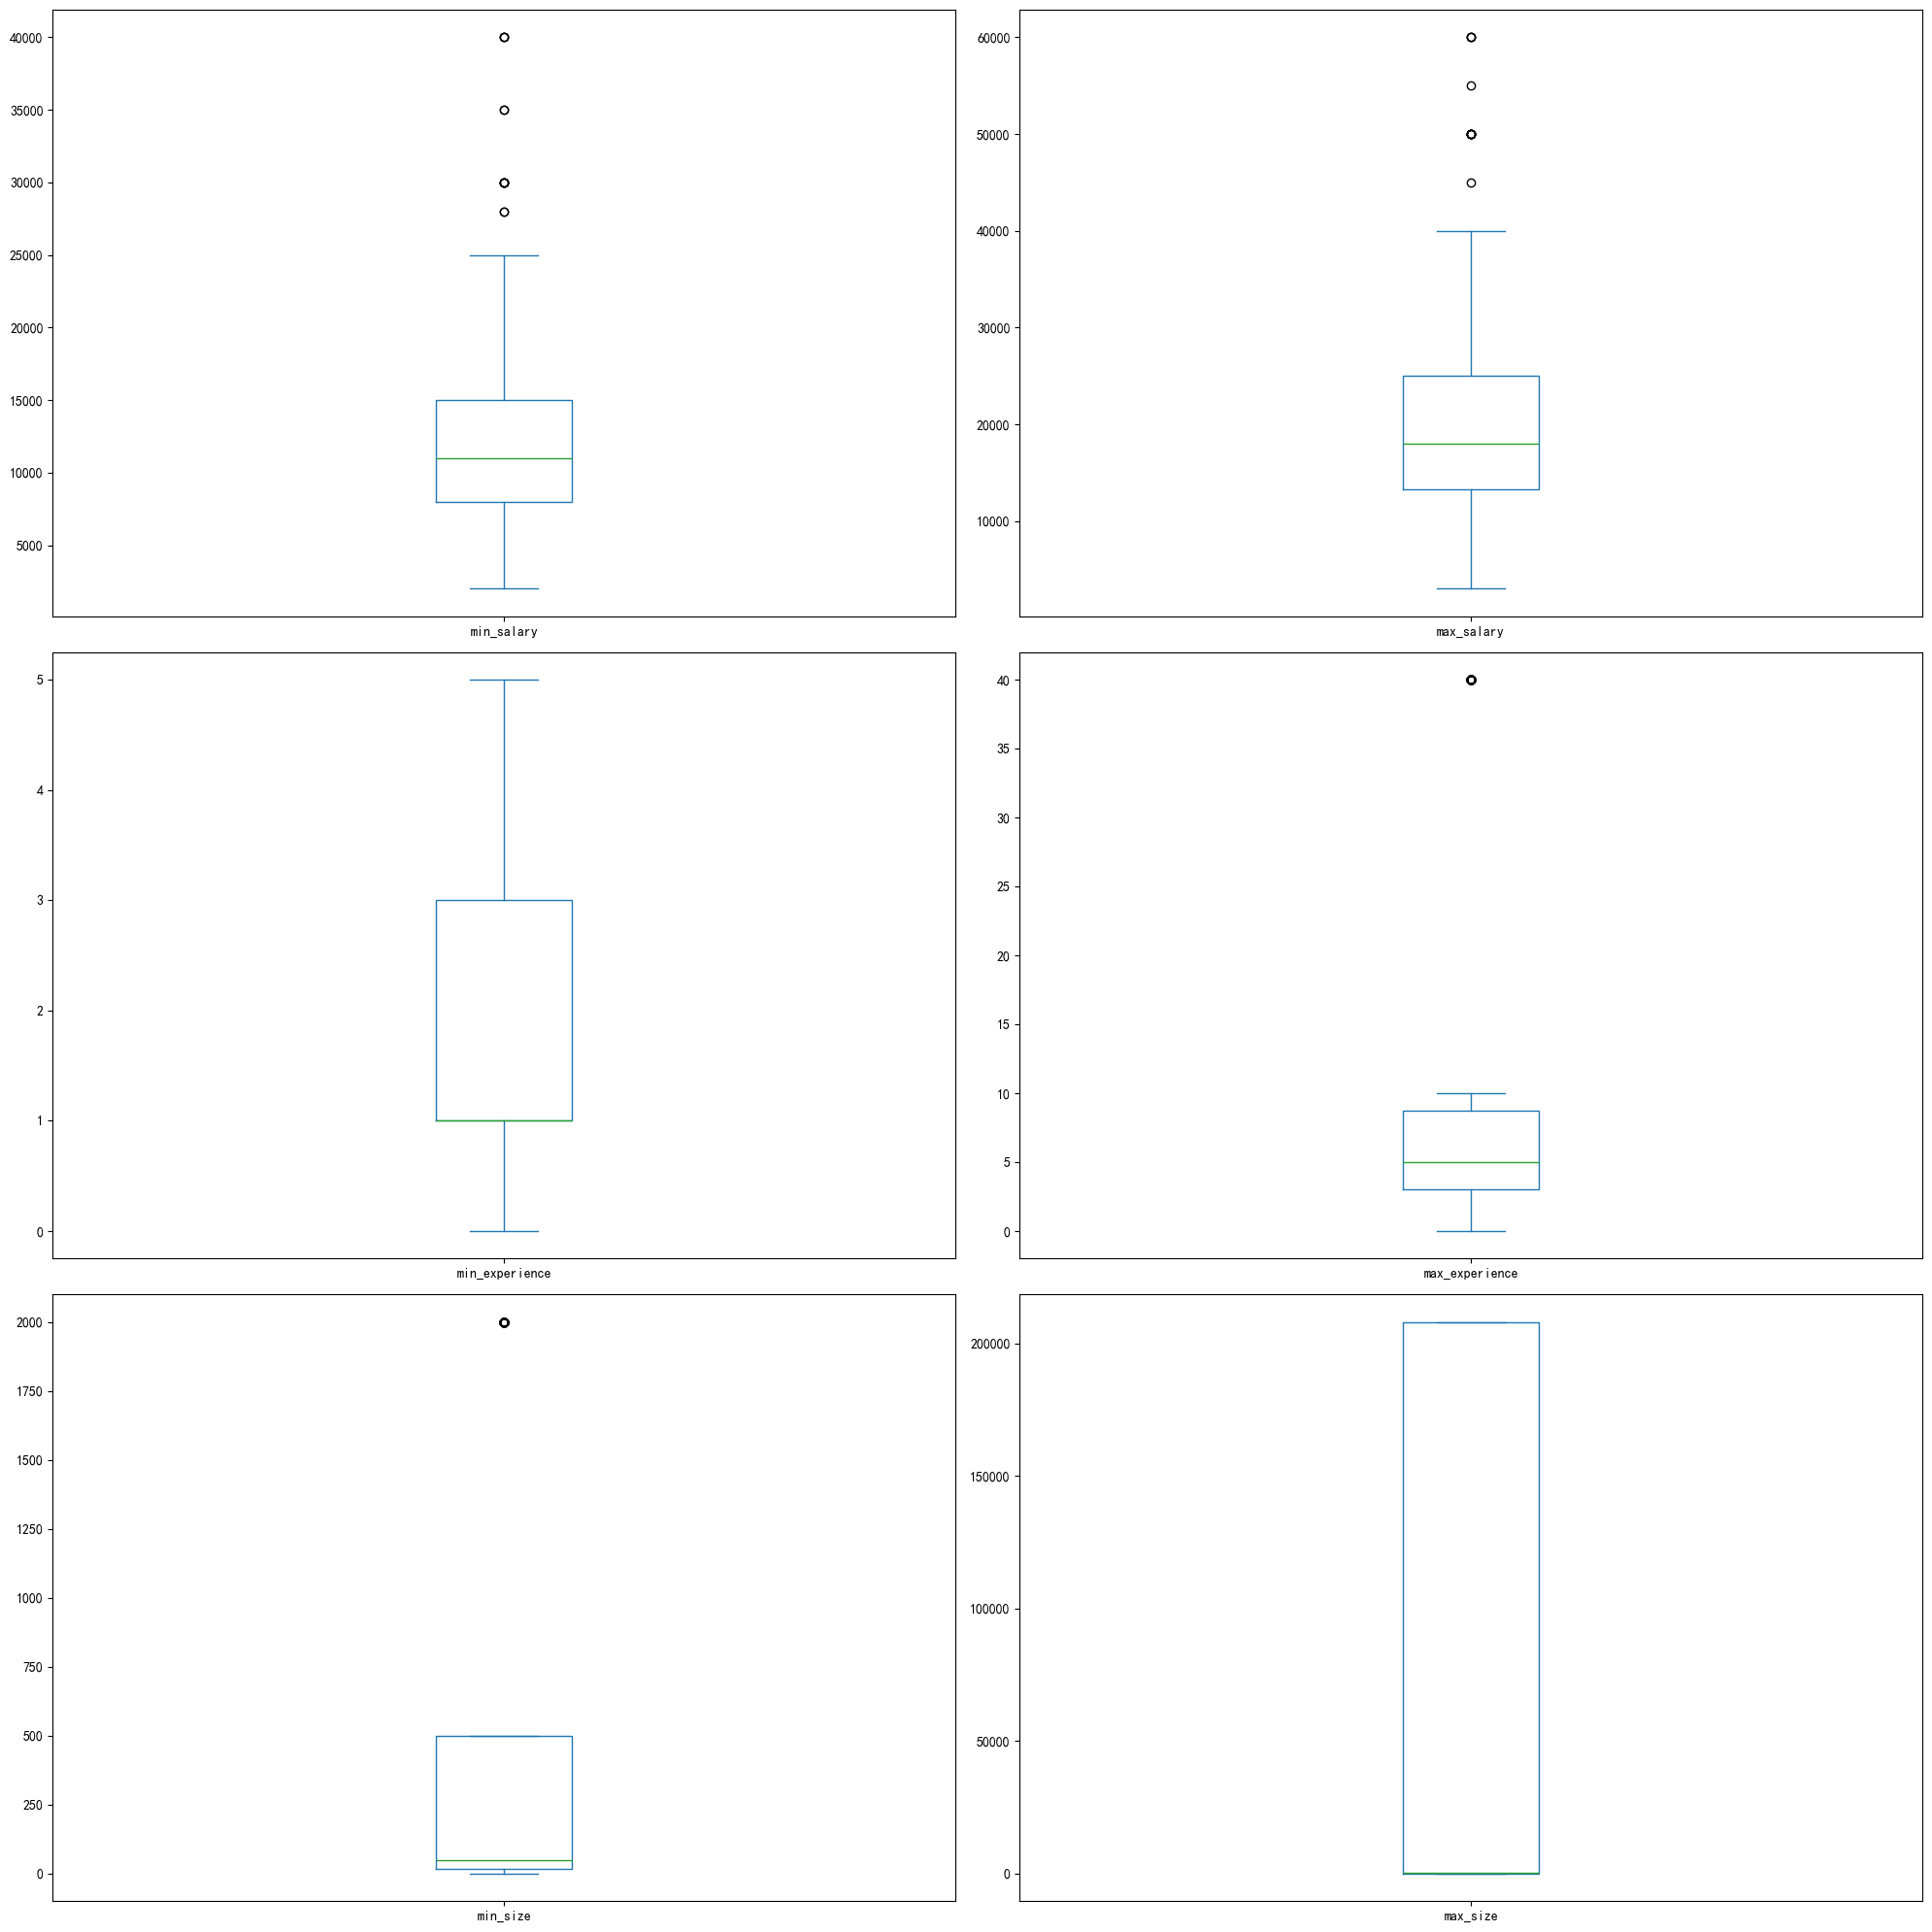

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

# 绘制所有数值型列的箱线图
numeric_df.plot(kind='box', subplots=True, layout=(3,2), figsize=(20, 20))
plt.tight_layout()
plt.show()

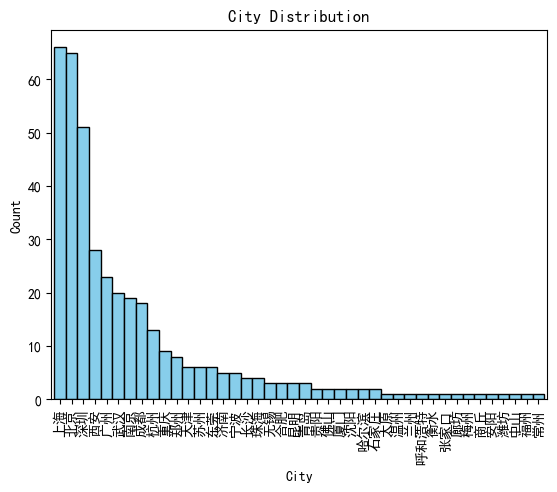

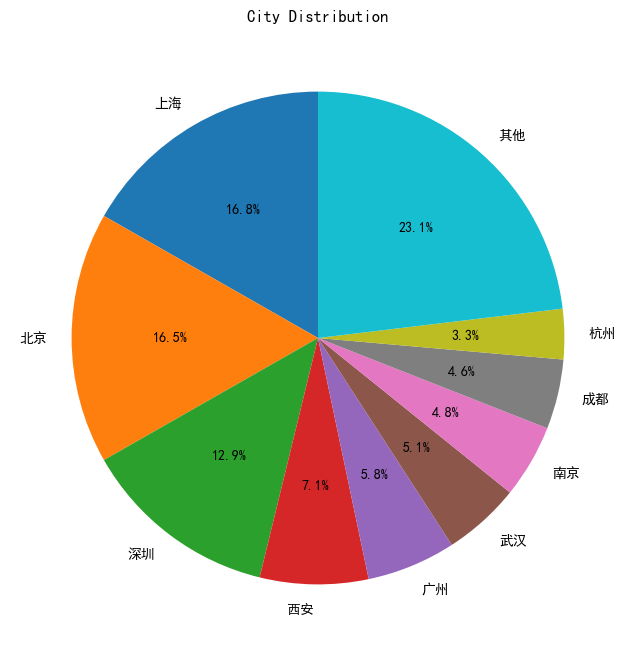

In [10]:
# 统计每种 city 的数量
city_counts = df2["city"].value_counts()

# 绘制柱状图
city_counts.plot(kind='bar', color='skyblue', edgecolor='black', width=1)

# 设置图表标题和坐标轴标签
plt.title('City Distribution')
plt.xlabel('City')
plt.ylabel('Count')

# 显示图表
plt.show()


# 只保留前 9 个城市，其余合并为 其他
top_9 = city_counts.head(9)
other = city_counts[9:].sum()
city_counts = pd.concat([top_9, pd.Series({"其他": other})])

# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie(city_counts, labels=city_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("City Distribution")
plt.show()

        min_salary                     max_salary                 
              mean      max     min          mean      max     min
city                                                              
上海    14030.303030  35000.0  3000.0  22090.909091  55000.0  4000.0
北京    16569.230769  40000.0  2000.0  26476.923077  60000.0  3000.0


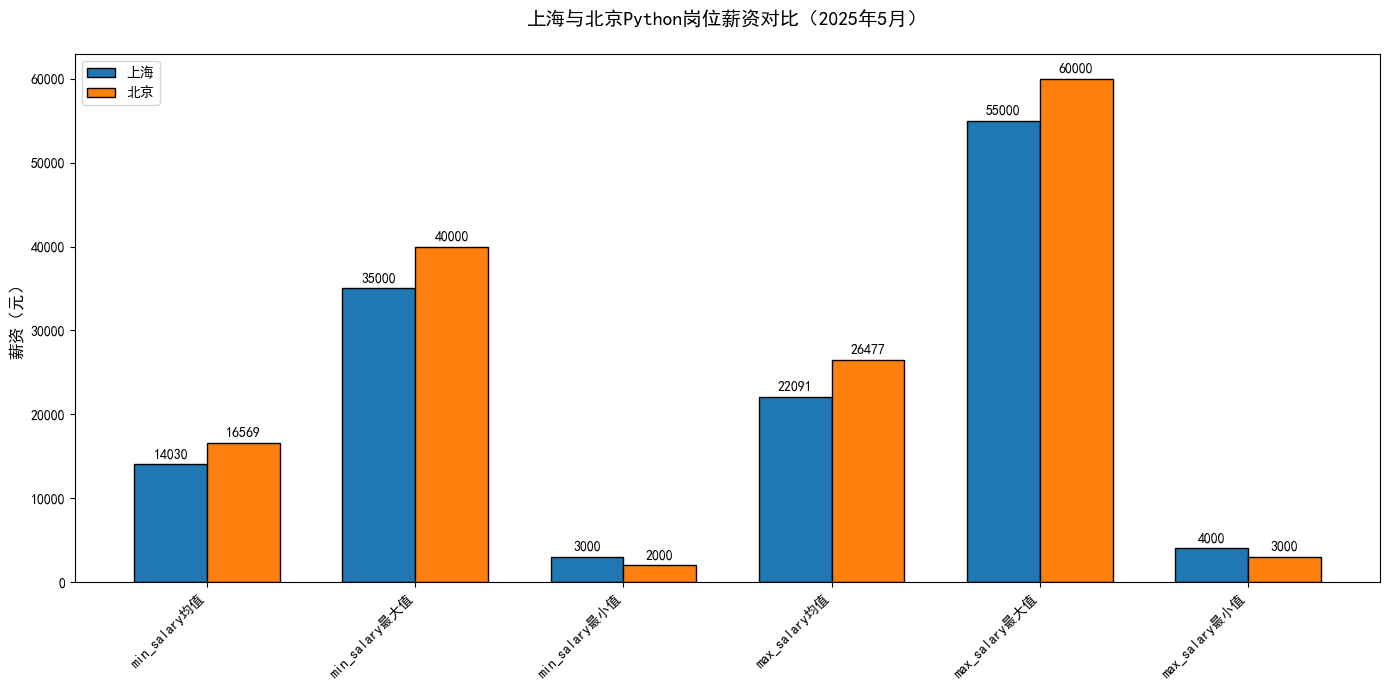

In [ ]:
import numpy as np

df_filtered = df2[df2['city'].isin(['北京', '上海'])]

# 统计薪资指标
salary_stats = df_filtered.groupby("city")[['min_salary','max_salary']].agg(["mean", "max", "min"])

print(salary_stats)

cities = ['上海', '北京']
metrics = ['min_salary均值', 'min_salary最大值', 'min_salary最小值',
          'max_salary均值', 'max_salary最大值', 'max_salary最小值']

shanghai = [14030.30, 35000.0, 3000.0, 22090.91, 55000.0, 4000.0]
beijing = [16569.23, 40000.0, 2000.0, 26476.92, 60000.0, 3000.0]

# 图表参数设置
x = np.arange(len(metrics))  # 指标位置
width = 0.35  # 柱体宽度
colors = ['#1f77b4', '#ff7f0e']  # 城市配色

# 创建画布
plt.figure(figsize=(14, 7))
ax = plt.subplot()

rects1 = ax.bar(x - width/2, shanghai, width, label='上海', color=colors[0], edgecolor='black')
rects2 = ax.bar(x + width/2, beijing, width, label='北京', color=colors[1], edgecolor='black')

ax.set_ylabel('薪资（元）', fontsize=12)
ax.set_title('上海与北京Python岗位薪资对比（2025年5月）', fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha='right')
ax.legend(loc='upper left')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

        min_salary                     max_salary                 
              mean      max     min          mean      max     min
city                                                              
北京    16569.230769  40000.0  2000.0  26476.923077  60000.0  3000.0
重庆     8000.000000  15000.0  4000.0  12777.777778  22000.0  6000.0


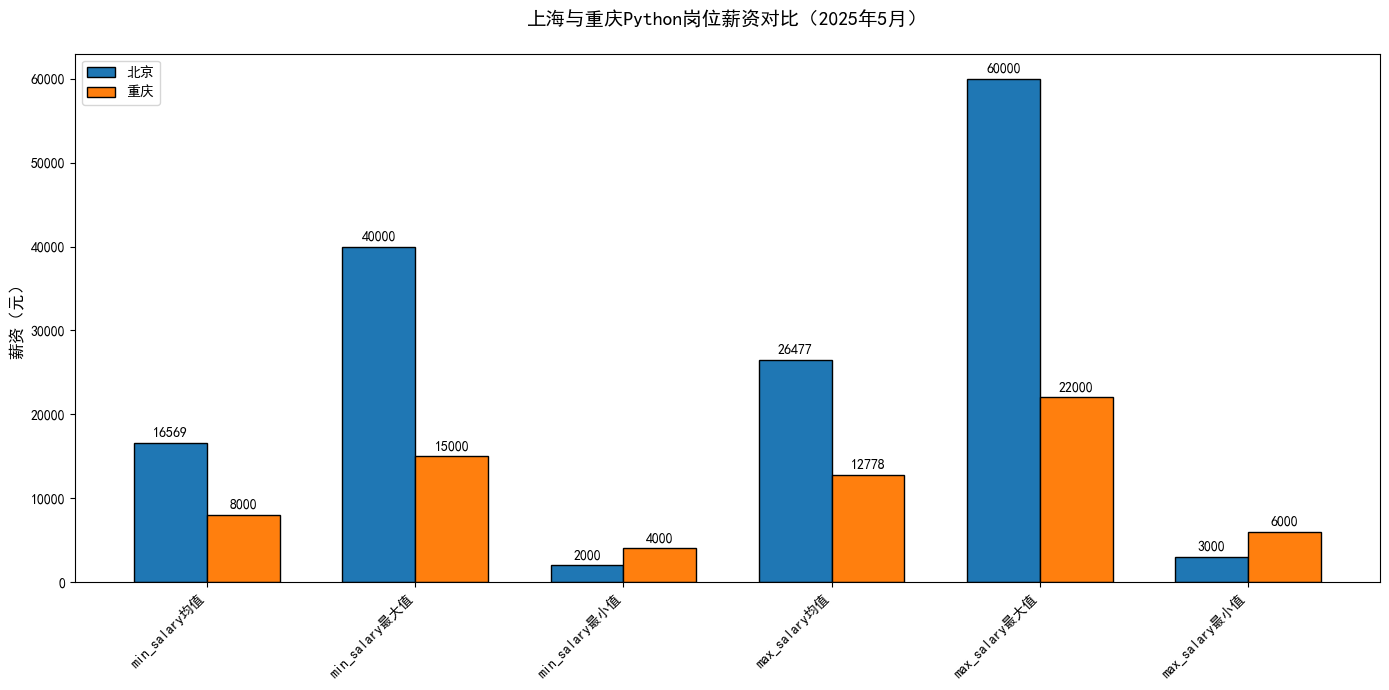

In [12]:
import numpy as np

df_filtered = df2[df2['city'].isin(['北京', '重庆'])]

# 统计薪资指标
salary_stats = df_filtered.groupby("city")[['min_salary','max_salary']].agg(["mean", "max", "min"])

print(salary_stats)

cities = ['北京', '重庆']
metrics = ['min_salary均值', 'min_salary最大值', 'min_salary最小值', 'max_salary均值', 'max_salary最大值', 'max_salary最小值']

beijing = salary_stats.values[0]
chongqing = salary_stats.values[1]

# 图表参数设置
x = np.arange(len(metrics))  # 指标位置
width = 0.35  # 柱体宽度
colors = ['#1f77b4', '#ff7f0e']  # 城市配色

# 创建画布
plt.figure(figsize=(14, 7))
ax = plt.subplot()

# 绘制并列柱状图[4,5](@ref)
rects1 = ax.bar(x - width/2, beijing, width, label='北京', color=colors[0], edgecolor='black')
rects2 = ax.bar(x + width/2, chongqing, width, label='重庆', color=colors[1], edgecolor='black')

# 图表元素配置
ax.set_ylabel('薪资（元）', fontsize=12)
ax.set_title('上海与重庆Python岗位薪资对比（2025年5月）', fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha='right')
ax.legend(loc='upper left')

# 添加数值标签[5](@ref)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

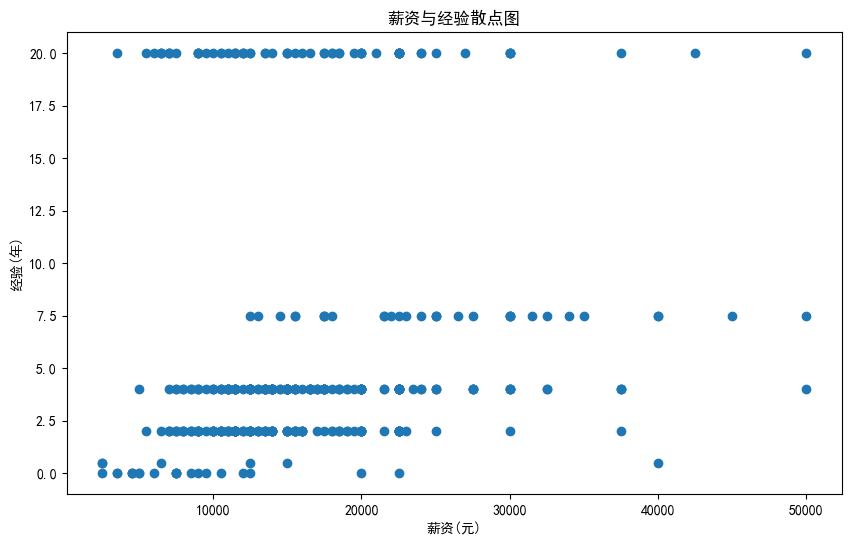

In [13]:
# 绘制散点图
plt.figure(figsize=(10, 6))

plt.scatter((df2['min_salary'] + df2['max_salary']) / 2, (df2['min_experience'] + df2['max_experience']) / 2)

# 添加图例和标签
plt.title('薪资与经验散点图')
plt.xlabel('薪资(元)')
plt.ylabel('经验(年)')
plt.show()

In [14]:
# 线图长处在于表达事物变化，比如时序数据，在分析股票时再用吧。